<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/Tutorial%202/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

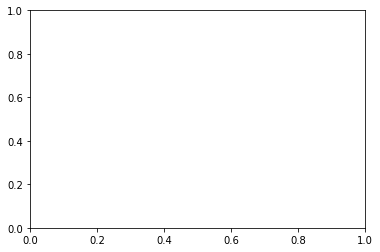

In [16]:
# Import packages

import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

In [17]:
def Gaussian(x, mu, sig):
  out = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sig)**2)
  return out

# Example run
print(Gaussian(1,0,0.5))

0.10798193302637613


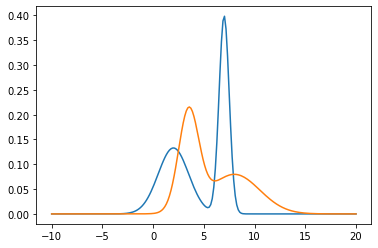

In [18]:
x = np.linspace(-10,20,200)
p_state1 = Gaussian(x, 2, 1.5) + Gaussian(x, 7, 0.5)
p_state1 /= np.trapz(p_state1, x)
p_state2 = Gaussian(x, 8, 2.5) + Gaussian(x, 3.5, 1)
p_state2 /= np.trapz(p_state2, x)
plt.plot(x,p_state1)
plt.plot(x,p_state2)
plt.show()

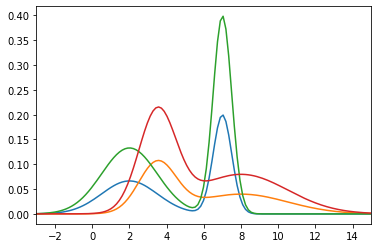

In [24]:
prior_1 = 0.5
prior_2 = 0.5

#prior_1 = 0.9
#prior_2 = 0.1

posterior1 = (p_state1*prior_1)
posterior2 = (p_state2*prior_2)
plt.xlim(-3,15)

# posterior is not working?
plt.plot(x, posterior1)
plt.plot(x, posterior2)

# plot likelihoods
plt.plot(x, p_state1)
plt.plot(x, p_state2)
plt.show()

## Classification with Bayes

In [29]:
from sklearn import datasets
ds = datasets.make_classification(1000,n_informative=2)
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(ds, test_size=0.33)

ValueError: ignored